<h2>IS453 Financial Analytics</h2><h2>Week 3 - Periodic Return Measures and Correlation</h2>


## Analysis to perform
 - Analyse three actively managed mutual funds versus the S&P 500 index ETF to assess their performance in comparison and determine if the asset managers are under/over performing the market. Also assess whether they appear to be index hugging.

 - Based on your analysis, would you recommend investing in any of of the active funds instead of the passive fund the benchmark?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

from matplotlib.ticker import FuncFormatter


### 1. Retreive data

Retreive data between from the last trading day of 2016 through the end of 2021 (5 years) from Yahoo finance for the listed ETFs and SPY ETF as a benchmark for comparison.  

**Use ETFs: 'SECT', 'VFMF' and 'VFMO'for comparison to 'SPY'** 

In [10]:
# your code here
tickers = ['SECT', 'VFMF', 'VFMO','SPY']
start_date = "2016-12-31"
end_date = "2022-01-01"

stocks_df = yf.download(tickers, start=start_date, end=end_date)

# make sure the last day of the previous year is the starting point
print(stocks_df.head(3))


[*********************100%%**********************]  4 of 4 completed
           Adj Close                       Close                       High  \
                SECT         SPY VFMF VFMO  SECT         SPY VFMF VFMO SECT   
Date                                                                          
2017-01-03       NaN  197.288879  NaN  NaN   NaN  225.240005  NaN  NaN  NaN   
2017-01-04       NaN  198.462524  NaN  NaN   NaN  226.580002  NaN  NaN  NaN   
2017-01-05       NaN  198.304916  NaN  NaN   NaN  226.399994  NaN  NaN  NaN   

                        ...  Low      Open                       Volume  \
                   SPY  ... VFMF VFMO SECT         SPY VFMF VFMO   SECT   
Date                    ...                                               
2017-01-03  225.830002  ...  NaN  NaN  NaN  225.039993  NaN  NaN    NaN   
2017-01-04  226.750000  ...  NaN  NaN  NaN  225.619995  NaN  NaN    NaN   
2017-01-05  226.580002  ...  NaN  NaN  NaN  226.270004  NaN  NaN    NaN   

     

**Extract the Adj Close price into a separate data frame to work with going forward**


In [11]:
# your code here
adj_close = stocks_df[['Adj Close']]

adj_close


Adj Close                                    
                 SECT         SPY        VFMF        VFMO
Date                                                     
2017-01-03        NaN  197.288879         NaN         NaN
2017-01-04        NaN  198.462524         NaN         NaN
2017-01-05        NaN  198.304916         NaN         NaN
2017-01-06        NaN  199.014420         NaN         NaN
2017-01-09        NaN  198.357452         NaN         NaN
...               ...         ...         ...         ...
2021-12-27  44.047951  456.750946  101.218010  129.994354
2021-12-28  43.989277  456.377655  101.040794  128.865234
2021-12-29  44.028397  456.961487  101.532860  128.979187
2021-12-30  43.940372  455.698181  101.049278  128.575470
2021-12-31  43.881699  454.549774  101.061539  128.606384

[1259 rows x 4 columns]

**Exercise Q1: Is the data complete?** 
- Which values are missing?
- Why might the be missing?

*Hint: use .info(), .isnull().sum(), plot methods to see how much and what data is missing.*

In [13]:
# your code here
adj_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-01-03 to 2021-12-31
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, SECT)  1089 non-null   float64
 1   (Adj Close, SPY)   1259 non-null   float64
 2   (Adj Close, VFMF)  977 non-null    float64
 3   (Adj Close, VFMO)  976 non-null    float64
dtypes: float64(4)
memory usage: 49.2 KB


In [14]:
adj_close.isnull()

Adj Close                     
                SECT    SPY   VFMF   VFMO
Date                                     
2017-01-03      True  False   True   True
2017-01-04      True  False   True   True
2017-01-05      True  False   True   True
2017-01-06      True  False   True   True
2017-01-09      True  False   True   True
...              ...    ...    ...    ...
2021-12-27     False  False  False  False
2021-12-28     False  False  False  False
2021-12-29     False  False  False  False
2021-12-30     False  False  False  False
2021-12-31     False  False  False  False

[1259 rows x 4 columns]

In [15]:
adj_close.isnull().sum()

Adj Close  SECT    170
           SPY       0
           VFMF    282
           VFMO    283
dtype: int64

<Axes: xlabel='Date'>

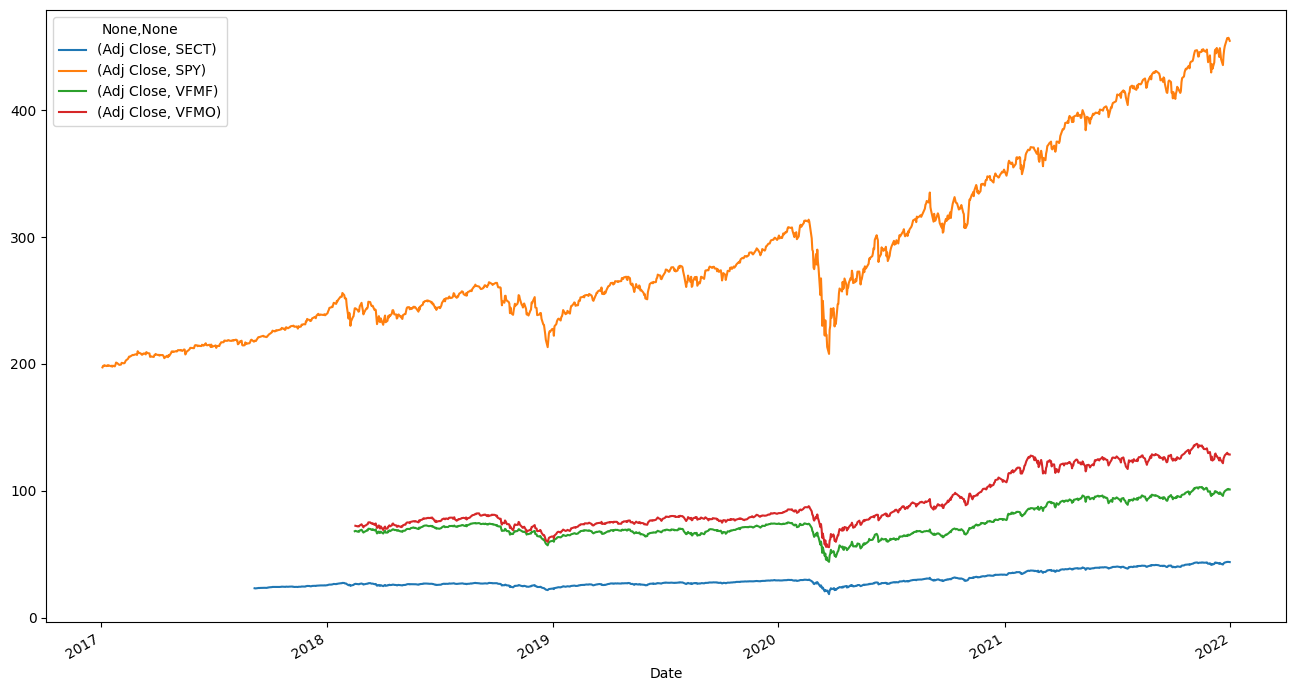

In [16]:
adj_close.plot(figsize=(16,9))

- Your answer here

### 2. Prepare the data

**Prepare the data in a spreadsheet**

Sometimes it is easier to inspect and clean up data manually in a spreadsheet.<BR>
Save the data frame to a CSV file manually inspect the data file.<BR>
*Hint use df.to_csv() method*
  
See when price data begins to be available for all of the instruments. Trim the file so that the data start at the last trading day of the year where price data is first available for all the instruments. Delete the older data rows of data.



In [18]:
# your code here
adj_close.to_csv("adj_close.csv")

You can also use the saved CSV file to retreive the data instead of having to call to Yahoo Finance each time.  

Load the CSV file data into a new dataframe and check the data to verify it imported correctly and is not missing any values now.<BR>
*Hint use the pd.read_csv() method and use the index_col parameter so that Date is set as the index for the dataframe*


In [21]:
# your code here
test_df = pd.read_csv("adj_close.csv")
test_df

,Unnamed: 0,Adj Close,Adj Close.1,Adj Close.2,Adj Close.3
0,NaN,SECT,SPY,VFMF,VFMO
1,Date,NaN,NaN,NaN,NaN
2,2017-01-03,NaN,197.28887939453125,NaN,NaN
3,2017-01-04,NaN,198.4625244140625,NaN,NaN
4,2017-01-05,NaN,198.30491638183594,NaN,NaN
...,...,...,...,...,...
1256,2021-12-27,44.047950744628906,456.7509460449219,101.21800994873047,129.99435424804688
1257,2021-12-28,43.98927688598633,456.3776550292969,101.0407943725586,128.865234375
1258,2021-12-29,44.02839660644531,456.96148681640625,101.5328598022461,128.97918701171875
1259,2021-12-30,43.940372467041016,455.69818115234375,101.04927825927734,128.57546997070312


In [23]:
# with the date as index
# test_df = pd.read_csv("adj_close.csv", index_col="Date") # this gives an error due to extra row on top 
test_df = pd.read_csv("adj_close.csv", skiprows=1, index_col="Unnamed: 0")

test_df

,SECT,SPY,VFMF,VFMO
Date,NaN,NaN,NaN,NaN
2017-01-03,NaN,197.288879,NaN,NaN
2017-01-04,NaN,198.462524,NaN,NaN
2017-01-05,NaN,198.304916,NaN,NaN
2017-01-06,NaN,199.014420,NaN,NaN
...,...,...,...,...
2021-12-27,44.047951,456.750946,101.218010,129.994354
2021-12-28,43.989277,456.377655,101.040794,128.865234
2021-12-29,44.028397,456.961487,101.532860,128.979187
2021-12-30,43.940372,455.698181,101.049278,128.575470


**Prepare the data in the dataframe**

Create a new dataframe from your original that limits the data to the same date range you used in the csv file.<BR>
*hint: use df.loc\['start_date':'end_date'\]* <BR>
Check that there are no null values in the new dataframe.

In [29]:
# your code here

stocks_df_price1 = test_df.loc['2018-02-16':'2021-12-31'] # i manually went to the csv to check

# make sure the last day of the previous year is the starting point - not too sure what this means 
print(stocks_df_price1.head(3))

                 SECT         SPY       VFMF       VFMO
2018-02-16  26.750252  243.869110  68.498863  72.491051
2018-02-20  26.508337  242.342178  67.807762  71.967697
2018-02-21  26.499027  241.136795  68.064713  72.238716


In [30]:
stocks_df_price1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, 2018-02-16 to 2021-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SECT    976 non-null    float64
 1   SPY     976 non-null    float64
 2   VFMF    976 non-null    float64
 3   VFMO    976 non-null    float64
dtypes: float64(4)
memory usage: 38.1+ KB


**Exercise Q2:**
  
- What time period does the your dataframe of complete data cover?


- Your answer here

2018-02-16 to 2021-12-31

### 3. Generate cumulative return series 
To compare performance of the funds. Generate the cumulative return series for the 3-year period (2019-2021) and for the most recent 1-year period.<BR><BR>
*Hint: use the pct_change and cumprod() methods*

In [34]:
stocks_df_price1 = test_df.loc['2019-01-02':'2021-12-31'] # seems like they want this 
print(stocks_df_price1.head(3))

                 SECT         SPY       VFMF       VFMO
2019-01-02  23.092169  227.637451  60.926735  63.957645
2019-01-03  22.572075  222.205429  59.879623  62.566013
2019-01-04  23.347492  229.648346  61.701553  64.814224


In [37]:
# your code here

# generate cum returns for 3y
cum_ret_series_3y = (1+stocks_df_price1.pct_change()).cumprod()-1

# subset of prices for 1 year 
stocks_df_price1_1y = test_df.loc['2021-01-04':'2021-12-31'] 

# generate cum returns for 1y
cum_ret_series_1y = (1+stocks_df_price1_1y.pct_change()).cumprod()-1

# check the first few rows of the cum return series.
print("3-year cum return series\n", cum_ret_series_3y.head())
print("1-year cum return series\n", cum_ret_series_1y.head())

3-year cum return series
                 SECT       SPY      VFMF      VFMO
2019-01-02       NaN       NaN       NaN       NaN
2019-01-03 -0.022523 -0.023863 -0.017186 -0.021759
2019-01-04  0.011057  0.008834  0.012717  0.013393
2019-01-07  0.022482  0.016788  0.023391  0.033946
2019-01-08  0.029484  0.026341  0.034064  0.047471
1-year cum return series
                 SECT       SPY      VFMF      VFMO
2021-01-04       NaN       NaN       NaN       NaN
2021-01-05  0.007203  0.006887  0.014352  0.015575
2021-01-06  0.017863  0.012907  0.048209  0.030620
2021-01-07  0.038606  0.027956  0.064794  0.063404
2021-01-08  0.044080  0.033813  0.057551  0.068458


<!-- ### 4. Visually compare the to the benchmark based on their cumulative returns
Plot the  adjusted close price cumulative return series for the 1-year and 3-year datasets. Plot each of them individually versus the benchmark fund, SPY, and see how closely the returns of each fund compares to the benchmark.
<BR>
*Hint: generate **separate** graphs for **each fund vs the benchmark**, not all on one graph.* <BR> -->


**Cumumlative return series comparison plots for 1 year period**

<Axes: title={'center': '1Y SECT vs. SPY'}>

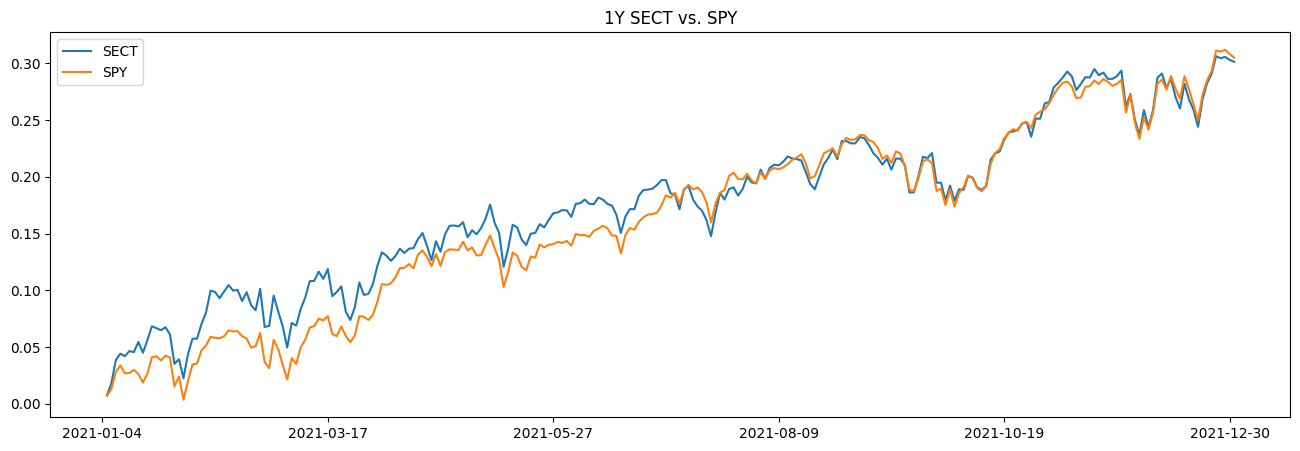

In [38]:
# sample code
cum_ret_series_1y[['SECT', 'SPY']].plot(figsize=(16,5),title='1Y SECT vs. SPY')

<Axes: title={'center': '1Y each fund vs. SPY'}>

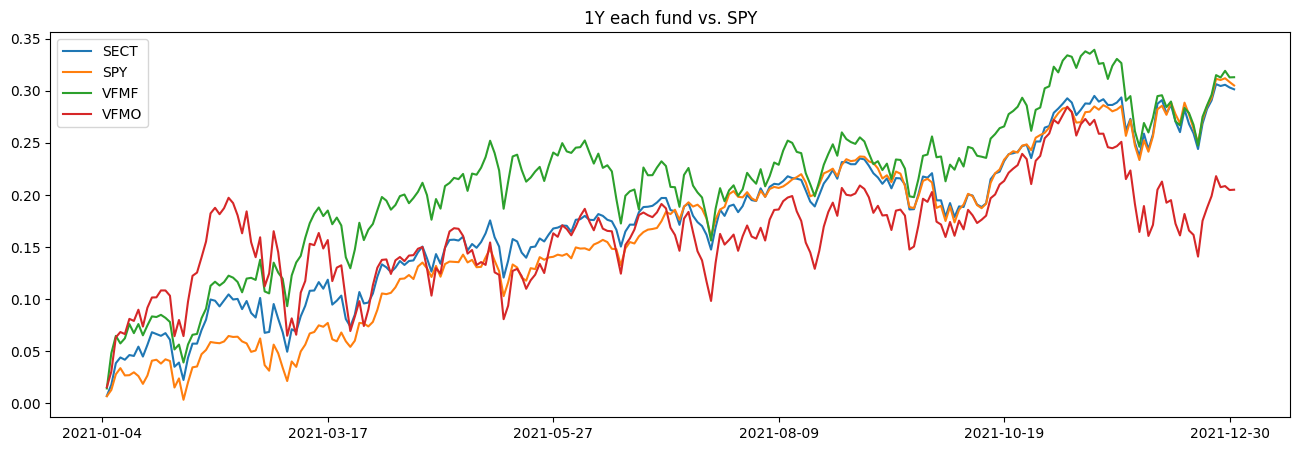

In [39]:
# your code here 
# for 1-year series plot each fund vs benchmark
cum_ret_series_1y[['SECT', 'SPY', 'VFMF', 'VFMO']].plot(figsize=(16,5),title='1Y each fund vs. SPY')

<Axes: title={'center': '3Y each fund vs. SPY'}>

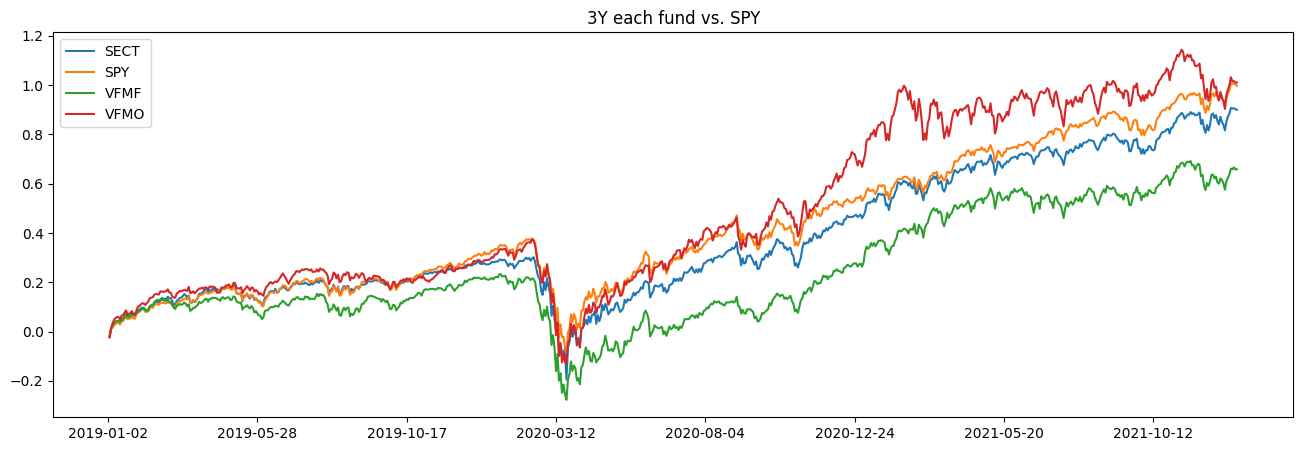

In [40]:
# your code here 
# for 3-year series plot each fund vs benchmark
cum_ret_series_3y[['SECT', 'SPY', 'VFMF', 'VFMO']].plot(figsize=(16,5),title='3Y each fund vs. SPY')

**Exercise Q3: Generate the plots and answer the below questions**<br>
Which fund looks like it is tracking 
 - Closest to the benchmark based on the 1 year data?
 - The benchmark the least based on the 1 year data?
 - Closest to the benchmark based on the 3 year data?
 - The benchmark the least based on the 3 year data?


- Your answer here

MY ANSWER
1) the closest seems to be SECT
2) the least seem to be VFMO
3) the closest seems to be SECT
4) the least seems to be VFMF

## Annualised returns

### 5. Calculate annualised returns for the 1-year and 3-year period data sets.

Use the formulas to calculate the annualize rate of return (ARR): <br>
- period return = (ending price - starting price)/starting price
- ARR = (1+period return)^(1/N) - 1) where N = number of years
- The period return is the last row value in the cumulative return series
- N = 1 for the most recent 1-year period, N= 3 for the 3-year period

**DYI Q1: Calculate Annualised returns</font>**<BR>
What is the most recent 1-year annualized return for 
- SECT
- VFMF
- VFMO

What is the 3-year annualized return for 
- SECT
- VFMF
- VFMO
  
Round all values to 4 decimal places.

In [51]:
# your code here
print(cum_ret_series_1y)
period_return = cum_ret_series_1y.iloc[[-1]] #need the [] to change into df
print(period_return)
arr_1y = (1+period_return)**(1/1)-1
print("1y ARR for each:")
print(arr_1y)

                SECT       SPY      VFMF      VFMO
2021-01-04       NaN       NaN       NaN       NaN
2021-01-05  0.007203  0.006887  0.014352  0.015575
2021-01-06  0.017863  0.012907  0.048209  0.030620
2021-01-07  0.038606  0.027956  0.064794  0.063404
2021-01-08  0.044080  0.033813  0.057551  0.068458
...              ...       ...       ...       ...
2021-12-27  0.306302  0.311374  0.315009  0.218037
2021-12-28  0.304562  0.310303  0.312706  0.207458
2021-12-29  0.305722  0.311979  0.319099  0.208525
2021-12-30  0.303112  0.308352  0.312817  0.204742
2021-12-31  0.301372  0.305055  0.312976  0.205032

[252 rows x 4 columns]
                SECT       SPY      VFMF      VFMO
2021-12-31  0.301372  0.305055  0.312976  0.205032
1y ARR for each:
                SECT       SPY      VFMF      VFMO
2021-12-31  0.301372  0.305055  0.312976  0.205032


In [53]:
print(cum_ret_series_3y)
period_return = cum_ret_series_3y.iloc[[-1]] #need the [] to change into df
print(period_return)
arr_3y = (1+period_return)**(1/3)-1
print("3y ARR for each:")
print(arr_3y)

                SECT       SPY      VFMF      VFMO
2019-01-02       NaN       NaN       NaN       NaN
2019-01-03 -0.022523 -0.023863 -0.017186 -0.021759
2019-01-04  0.011057  0.008834  0.012717  0.013393
2019-01-07  0.022482  0.016788  0.023391  0.033946
2019-01-08  0.029484  0.026341  0.034064  0.047471
...              ...       ...       ...       ...
2021-12-27  0.907484  1.006484  0.661307  1.032507
2021-12-28  0.904944  1.004844  0.658398  1.014853
2021-12-29  0.906638  1.007409  0.666475  1.016634
2021-12-30  0.902826  1.001859  0.658538  1.010322
2021-12-31  0.900285  0.996815  0.658739  1.010805

[757 rows x 4 columns]
                SECT       SPY      VFMF      VFMO
2021-12-31  0.900285  0.996815  0.658739  1.010805
3y ARR for each:
                SECT       SPY      VFMF      VFMO
2021-12-31  0.238624  0.259252  0.183748  0.262186


### 6. Calculate the relative peformance vs the benchmark 
Did the other ETFs over or under perform the SPY benchmark for the 1-year and 3-year periods? <BR>
*Hint: Relative performance is the difference in the annualised returns for the given period between the fund and the benchmark. If positive, the fund outperformed the index, if negative, it underperformed.*<BR><BR>
**DYI Q2: Calculate relative performance** <BR>
What is the most recent 1-year relative performance for each fund vs the benchmark?
- SECT
- VFMF
- VFMO

What is the 3-year relative performance for each fund vs the benchmark? 
- SECT
- VFMF
- VFMO
  
Round all values to 4 decimal places.
  

In [61]:
# your code here
# hint: subtract the spy annualised return from the annualised return dataframe
spy_ann_ret_1y = arr_1y['SPY']

# check the type and value of spy_ann_ret_1y before using
spy_ann_ret_1y.info()

sect_vs_spy = arr_1y['SECT'] - spy_ann_ret_1y
vfmf_vs_spy = arr_1y['VFMF'] - spy_ann_ret_1y
vfmo_vs_spy = arr_1y['VFMO'] - spy_ann_ret_1y

print(f"SECT VS SPY relative performance is {sect_vs_spy[0].round(4)}")
print(f"VFMF VS SPY relative performance is {vfmf_vs_spy[0].round(4)}")
print(f"VFMO VS SPY relative performance is {vfmo_vs_spy[0].round(4)}")

<class 'pandas.core.series.Series'>
Index: 1 entries, 2021-12-31 to 2021-12-31
Series name: SPY
Non-Null Count  Dtype  
--------------  -----  
1 non-null      float64
dtypes: float64(1)
memory usage: 124.0+ bytes
SECT VS SPY relative performance is -0.0965
VFMF VS SPY relative performance is -0.3381
VFMO VS SPY relative performance is 0.014


In [62]:
# 3 year
spy_ann_ret_3y = arr_3y['SPY']

sect_vs_spy = arr_3y['SECT'] - spy_ann_ret_3y
vfmf_vs_spy = arr_3y['VFMF'] - spy_ann_ret_3y
vfmo_vs_spy = arr_3y['VFMO'] - spy_ann_ret_3y

print(f"SECT VS SPY relative performance is {sect_vs_spy[0].round(4)}")
print(f"VFMF VS SPY relative performance is {vfmf_vs_spy[0].round(4)}")
print(f"VFMO VS SPY relative performance is {vfmo_vs_spy[0].round(4)}")

SECT VS SPY relative performance is -0.0206
VFMF VS SPY relative performance is -0.0755
VFMO VS SPY relative performance is 0.0029


## Correlation of returns

### 7. Calculate the correlation of each of the funds versus the SPY benchmark based on 1 year returns. 
Use a scatter plot to visually compare the relationship between the returns of each fund and the benchmark.<BR>
*Hint: Use the percent return seires pct_change() of prices for correlation analysis. Apply pandas corr() method to calculate correlations.*

**DYI Q3: What is the 1-year correlation for each fund vs SPY?**
- SECT
- VFMF
- VFMO

In [75]:
# your code here
percent_ret_series_1y = stocks_df_price1_1y.pct_change()
percent_ret_series_1y.corr()

,SECT,SPY,VFMF,VFMO
SECT,1.000000,0.932158,0.879753,0.924562
SPY,0.932158,1.000000,0.777884,0.818605
VFMF,0.879753,0.777884,1.000000,0.854103
VFMO,0.924562,0.818605,0.854103,1.000000


**Generate scatter plots to compare 1-year returns each fund vs SPY**

Text(0.5, 1.0, '1Y SECT vs SPY')

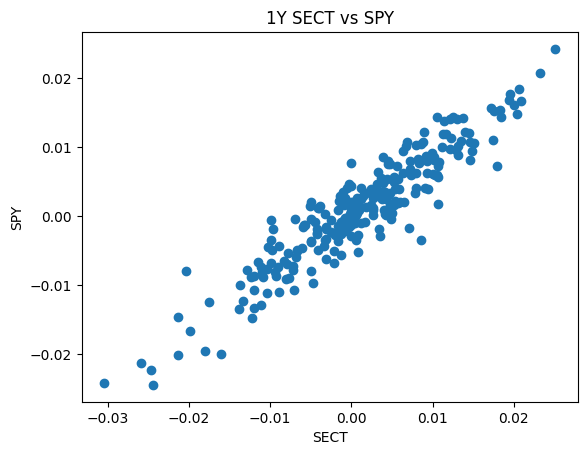

In [76]:
# sample code

# SECT vs SPY
plt.scatter(percent_ret_series_1y['SECT'],percent_ret_series_1y['SPY'])
plt.xlabel('SECT')
plt.ylabel('SPY')
plt.title('1Y SECT vs SPY')

Text(0.5, 1.0, '1Y VFMO vs SPY')

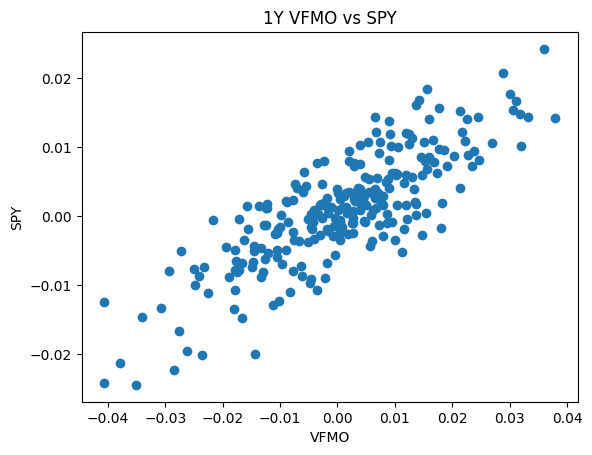

In [77]:
# your code here
# VFMO vs SPY
plt.scatter(percent_ret_series_1y['VFMO'],percent_ret_series_1y['SPY'])
plt.xlabel('VFMO')
plt.ylabel('SPY')
plt.title('1Y VFMO vs SPY')

Text(0.5, 1.0, '1Y VFMF vs SPY')

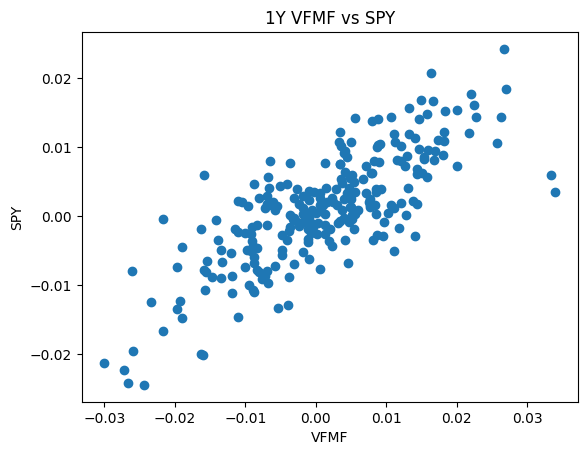

In [78]:
# VFMF vs SPY
plt.scatter(percent_ret_series_1y['VFMF'],percent_ret_series_1y['SPY'])
plt.xlabel('VFMF')
plt.ylabel('SPY')
plt.title('1Y VFMF vs SPY')

**DYI Q4: What is the 3-year correlation for each fund vs SPY?**

- SECT
- VFMF
- VFMO

In [79]:
percent_ret_series_3y = stocks_df_price1.pct_change()
percent_ret_series_3y.corr()

,SECT,SPY,VFMF,VFMO
SECT,1.000000,0.870769,0.841452,0.829023
SPY,0.870769,1.000000,0.917744,0.884653
VFMF,0.841452,0.917744,1.000000,0.887917
VFMO,0.829023,0.884653,0.887917,1.000000


**Generate scatter plots to compare 3-year returns each fund vs SPY**

Text(0.5, 1.0, '3Y SECT vs SPY')

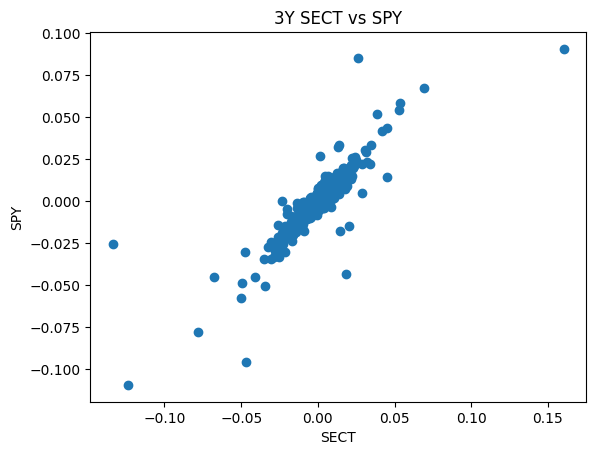

In [81]:
# your code here
# SECT vs SPY
plt.scatter(percent_ret_series_3y['SECT'],percent_ret_series_3y['SPY'])
plt.xlabel('SECT')
plt.ylabel('SPY')
plt.title('3Y SECT vs SPY')

Text(0.5, 1.0, '3Y VFMO vs SPY')

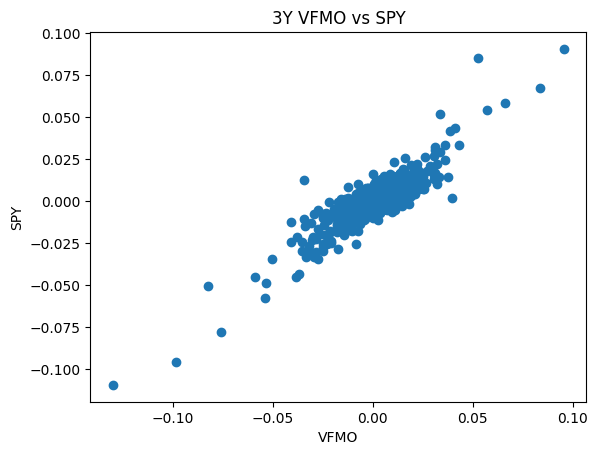

In [82]:
# VFMO vs SPY
plt.scatter(percent_ret_series_3y['VFMO'],percent_ret_series_3y['SPY'])
plt.xlabel('VFMO')
plt.ylabel('SPY')
plt.title('3Y VFMO vs SPY')

Text(0.5, 1.0, '3Y VFMF vs SPY')

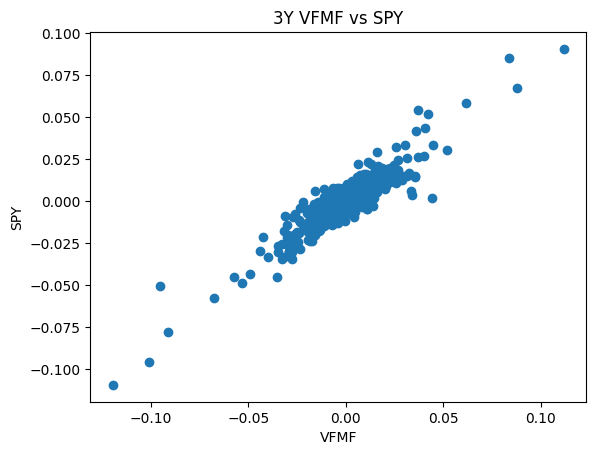

In [83]:
# VFMF vs SPY
plt.scatter(percent_ret_series_3y['VFMF'],percent_ret_series_3y['SPY'])
plt.xlabel('VFMF')
plt.ylabel('SPY')
plt.title('3Y VFMF vs SPY')

### 10. Final Analysis
*Hint: active management will have lower correlation to the benchmark*

**DYI Q5:**

**Based on the 1-year data:** <br>

- Which fund is the most actively management?

- Which fund is the least actively managed?
 
- Which fund(s) have annualized returns that beat the benchmark? 
 
**Based on the 3-year data:**

- Which fund is the most actively managed?
  
- Which fund is the least actively managed?

- Which fund(s) have annualized returns that beat the benchmark?

- Are there any of the funds that you evaluated that you can recommend that are both actively managed and have returns that beat the benchmark? 

- If so, which are they and how strongly do you feel about recommending them based on the data and why?

- Your answers here

**1 year data**
- most actively managed: VFMF (corr of 0.777884 which has the least correlation to SPY)
- least actively managed: SECT (corr of 0.932158 which has the highest correlation to SPY)
- beat the benchmark: VFMO (VFMO VS SPY relative performance is 0.014)

**3 year data**
- most actively managed: SECT (corr of 0.870769 which has the least correlation to SPY)
- least actively managed: VFMF (corr of 0.917744 which has the highest correlation to SPY)
- beat the benchmark: VFMO (VFMO VS SPY relative performance is 0.0029)
- both actively managed + beat the benchmark: Y
- - VFMO 
- - beats the benchmark for both 1y and 3y and is placed in the middle for the correlation matrix for both years
